In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import re
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.utils import shuffle
import pickle
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import matplotlib.font_manager
from matplotlib import style
style.use('seaborn') or plt.style.use('seaborn')

from tqdm.notebook import tqdm
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import plotly.graph_objects as go
import seaborn as sns

from collections import Counter
import operator


from xgboost import plot_importance


from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

from sklearn.decomposition import FactorAnalysis

import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import scipy.stats as ss

from sklearn.utils import shuffle

from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

import sklearn.metrics as metrics

from statannot import add_stat_annotation

from scipy.stats import shapiro
import statsmodels.api as sm
from scipy import stats

# Leer base de datos

In [2]:
data_base = 'Secuenciación novogene 2023 controles.xlsx'

In [3]:
X_Data = pd.read_excel(data_base, index_col=0)

In [4]:

X_Data_ = X_Data.T
X_Data_.head()

,#miRNA,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7a-5p,hsa-let-7a-2-3p,hsa-let-7a-5p,hsa-let-7b-5p,hsa-let-7b-3p,hsa-let-7c-3p,hsa-let-7c-5p,...,hsa-miR-9902,hsa-miR-9902,hsa-miR-9903,hsa-miR-9983-3p,hsa-miR-9985,hsa-miR-9986,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-5p,hsa-miR-99b-3p
AD_01 (B1),read_count,208.00,21715.00,21457.00,8.00,21452.00,311002.00,71.00,26.00,234153.00,...,0.00,0.00,0.00,7.00,39.00,0.00,84.00,497473.00,23602.00,2342.00
AD_08 (B6),read_count,286.00,16808.00,16661.00,4.00,16658.00,260229.00,76.00,23.00,161196.00,...,0.00,0.00,1.00,4.00,61.00,0.00,42.00,560564.00,24318.00,2072.00
AD_09 (B7),read_count,232.00,13533.00,13368.00,5.00,13365.00,212973.00,63.00,17.00,143010.00,...,0.00,0.00,0.00,4.00,27.00,0.00,34.00,431230.00,20704.00,1780.00
AD_12 (B10),read_count,538.00,10965.00,10845.00,12.00,10844.00,217111.00,127.00,41.00,115814.00,...,0.00,0.00,1.00,10.00,14.00,0.00,63.00,877183.00,21752.00,1944.00
AD_14 (B12),read_count,395.00,19962.00,19792.00,12.00,19793.00,315713.00,165.00,37.00,186649.00,...,0.00,0.00,0.00,2.00,49.00,0.00,61.00,634738.00,27180.00,2884.00


In [5]:
X_Data_['Target'] = 0 #CN
X_Data_.iloc[0:23, -1] = 1 #AD
X_Data_.iloc[48::, -1] = 2 #DFT

X_Data_;

In [6]:
X_Data_ = X_Data_.reset_index(drop=True)
X_Data_ = X_Data_.iloc[:,1::]
X_Data_

,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7a-5p,hsa-let-7a-2-3p,hsa-let-7a-5p,hsa-let-7b-5p,hsa-let-7b-3p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,...,hsa-miR-9902,hsa-miR-9903,hsa-miR-9983-3p,hsa-miR-9985,hsa-miR-9986,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-5p,hsa-miR-99b-3p,Target
0,208.00,21715.00,21457.00,8.00,21452.00,311002.00,71.00,26.00,234153.00,1412.00,...,0.00,0.00,7.00,39.00,0.00,84.00,497473.00,23602.00,2342.00,1
1,286.00,16808.00,16661.00,4.00,16658.00,260229.00,76.00,23.00,161196.00,1294.00,...,0.00,1.00,4.00,61.00,0.00,42.00,560564.00,24318.00,2072.00,1
2,232.00,13533.00,13368.00,5.00,13365.00,212973.00,63.00,17.00,143010.00,1028.00,...,0.00,0.00,4.00,27.00,0.00,34.00,431230.00,20704.00,1780.00,1
3,538.00,10965.00,10845.00,12.00,10844.00,217111.00,127.00,41.00,115814.00,1271.00,...,0.00,1.00,10.00,14.00,0.00,63.00,877183.00,21752.00,1944.00,1
4,395.00,19962.00,19792.00,12.00,19793.00,315713.00,165.00,37.00,186649.00,2065.00,...,0.00,0.00,2.00,49.00,0.00,61.00,634738.00,27180.00,2884.00,1
5,341.00,21177.00,20926.00,11.00,20931.00,252266.00,108.00,19.00,173031.00,1263.00,...,0.00,0.00,5.00,32.00,0.00,64.00,617260.00,24382.00,1580.00,1
6,320.00,17948.00,17756.00,3.00,17754.00,253057.00,91.00,27.00,156479.00,1277.00,...,0.00,0.00,5.00,27.00,0.00,57.00,678888.00,27314.00,2036.00,1
7,367.00,18578.00,18429.00,5.00,18426.00,279261.00,125.00,28.00,136431.00,1809.00,...,0.00,0.00,15.00,42.00,0.00,72.00,612816.00,22998.00,2724.00,1
8,482.00,32001.00,31702.00,13.00,31708.00,360553.00,135.00,35.00,225004.00,1954.00,...,0.00,0.00,11.00,68.00,0.00,117.00,906958.00,34573.00,2127.00,1
9,289.00,16751.00,16542.00,0.00,16542.00,277461.00,78.00,21.00,178977.00,1345.00,...,0.00,0.00,7.00,65.00,0.00,65.00,468998.00,22610.00,2062.00,1


In [7]:
X_Data_ = X_Data_[X_Data_['Target'] != 2]
X_Data_;

### Chequear nan

In [8]:
nan_sum_per_column = X_Data_.isnull().sum()


columns_with_more_than_10_nans = nan_sum_per_column[nan_sum_per_column > 1]


In [9]:
X_Data_ = X_Data_.copy()
X_Data_.dropna(inplace=True)

In [10]:
X_Data_.shape

(48, 2885)

In [11]:
X_Data_ = X_Data_.T.drop_duplicates().T

In [12]:
X_Data_ = X_Data_.apply(pd.to_numeric, errors='coerce')

In [13]:
new_column_names = [f'{column}_{i+1}' for i, column in enumerate(X_Data_.columns)]
X_Data_.columns = new_column_names


In [14]:
new_column_names[-1]

'Target_1008'

In [15]:
from scipy.stats import mannwhitneyu

numeric_features = X_Data_.columns

# Dividir el DataFrame en dos grupos según el valor de 'Target'
group_0 = X_Data_[X_Data_['Target_1008'] == 0]
group_1 = X_Data_[X_Data_['Target_1008'] == 1]

# Realizar la prueba de Mann-Whitney U para variables numéricas
significant_numeric_features = []

for feature in numeric_features:
    _, p_value = mannwhitneyu(group_0[feature], group_1[feature], alternative='two-sided')
    if p_value < 0.01:
        significant_numeric_features.append(feature)

# Mostrar las variables significativas
print("Variables significativas entre ambos grupos:", significant_numeric_features)

significant_numeric_features.remove('Target_1008')

Variables significativas entre ambos grupos: ['hsa-let-7e-3p_12', 'hsa-miR-103a-2-5p_37', 'hsa-miR-106b-5p_46', 'hsa-miR-1197_61', 'hsa-miR-1277-3p_108', 'hsa-miR-1296-5p_130', 'hsa-miR-1306-3p_140', 'hsa-miR-137-5p_166', 'hsa-miR-138-5p_168', 'hsa-miR-17-5p_224', 'hsa-miR-19a-3p_285', 'hsa-miR-212-5p_315', 'hsa-miR-219a-5p_329', 'hsa-miR-299-3p_378', 'hsa-miR-29c-3p_385', 'hsa-miR-302a-3p_392', 'hsa-miR-30e-5p_420', 'hsa-miR-342-3p_502', 'hsa-miR-34a-5p_506', 'hsa-miR-3613-3p_517', 'hsa-miR-374b-3p_543', 'hsa-miR-374b-5p_544', 'hsa-miR-410-3p_587', 'hsa-miR-520a-5p_772', 'hsa-miR-522-3p_779', 'hsa-miR-539-3p_786', 'hsa-miR-574-5p_841', 'hsa-miR-671-5p_904', 'hsa-miR-885-5p_972', 'hsa-miR-9-5p_977', 'hsa-miR-9-5p_978', 'hsa-miR-9-5p_980', 'hsa-miR-93-5p_986', 'Target_1008']


In [16]:
len(significant_numeric_features)

33

In [17]:
X =  X_Data_.drop(['Target_1008'], axis = 1)
X = X[significant_numeric_features]
y_ =  X_Data_['Target_1008']

In [18]:
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.1, random_state=10000)



In [19]:
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler



pipeline = Pipeline([
    ('scaler', MinMaxScaler((0.05, 0.95))),
    ('regressor', XGBClassifier())
])


#pipeline =  XGBRegressor(**best_params)

sfs_I = SFS(pipeline,
          k_features="best",
          forward=True,
          floating=False,
          scoring='accuracy',
          verbose=2,
          cv=3,
          n_jobs=-1)

sfs_I = sfs_I.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  33 | elapsed:    2.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    2.6s finished

[2023-12-05 16:51:43] Features: 1/33 -- score: 0.7682539682539682[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  32 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.1s finished

[2023-12-05 16:51:43] Features: 2/33 -- score: 0.792063492063492[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.1s finished

[2023-12-05 16:51:43] Features: 3/33 -- score: 0.8365079365079365[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of 

[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2023-12-05 16:51:46] Features: 30/33 -- score: 0.8825396825396825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2023-12-05 16:51:46] Features: 31/33 -- score: 0.8571428571428572[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2023-12-05 16:51:46] Features: 32/33 -- score: 0.7904761904761904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.

[2023-12-05 16:51:46] Features: 33/33 -- score: 0.7714285714285715

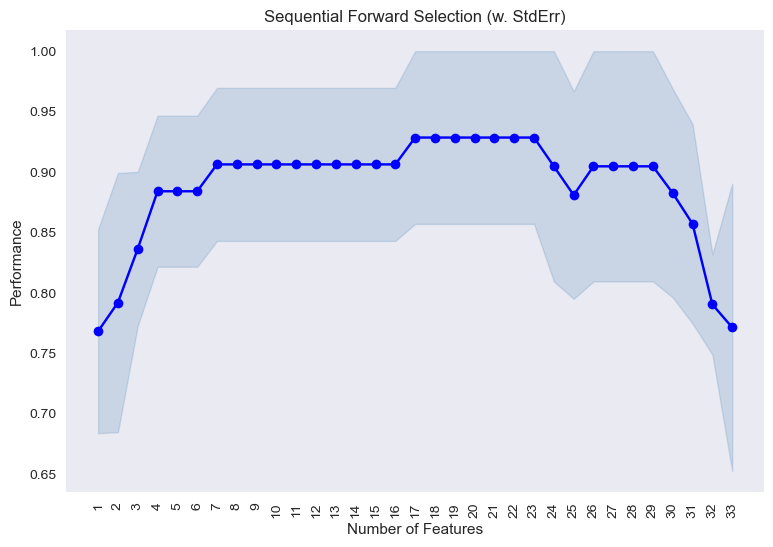

In [20]:
plt.rcParams["figure.figsize"] = (9,6)

fig = plot_sfs(sfs_I.get_metric_dict(), kind='std_err')
plt.xticks(rotation=90)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [21]:
list(sfs_I.k_feature_names_)

['hsa-let-7e-3p_12',
 'hsa-miR-103a-2-5p_37',
 'hsa-miR-106b-5p_46',
 'hsa-miR-1197_61',
 'hsa-miR-1296-5p_130',
 'hsa-miR-1306-3p_140',
 'hsa-miR-138-5p_168',
 'hsa-miR-17-5p_224',
 'hsa-miR-19a-3p_285',
 'hsa-miR-212-5p_315',
 'hsa-miR-219a-5p_329',
 'hsa-miR-29c-3p_385',
 'hsa-miR-302a-3p_392',
 'hsa-miR-3613-3p_517',
 'hsa-miR-374b-5p_544',
 'hsa-miR-671-5p_904',
 'hsa-miR-93-5p_986']

In [23]:
X_ = X[list(sfs_I.k_feature_names_)]

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import xgboost as xgb


n_splits = 10
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

y_test_list = []
y_pred_list = []
importances = []
for train_index, test_index in kf.split(X_,y_):
    X_train, X_test = X_.iloc[train_index, :], X_.iloc[test_index,:]
    y_train, y_test = y_[train_index], y_[test_index]

    scaler = MinMaxScaler((0.05, 0.95))
    scaling_data = scaler.fit_transform(X_train)
    X_s = pd.DataFrame(scaling_data, columns= X_train.columns, index = X_train.index)
    X_train =  X_s.copy()

    scaler = MinMaxScaler((0.05, 0.95))
    scaling_data = scaler.fit_transform(X_test)
    X_s = pd.DataFrame(scaling_data, columns= X_test.columns, index = X_test.index)
    X_test =  X_s.copy()

    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)

    y_predict = model.predict_proba(X_test)[:, 1]

    y_test_list.extend(y_test.to_list())
    y_pred_list.extend(list(y_predict))
    
    importances.append(model.feature_importances_)
    
    
f1=f1_score(y_test_list, np.round(y_pred_list))
accuracy=accuracy_score(y_test_list, np.round(y_pred_list))
recall=recall_score(y_test_list, np.round(y_pred_list))
precision=precision_score(y_test_list, np.round(y_pred_list))

Text(0.5, 1.0, 'auc=0.83\n acc=0.77 prec=0.83 \n f1=0.73 rec=0.65')

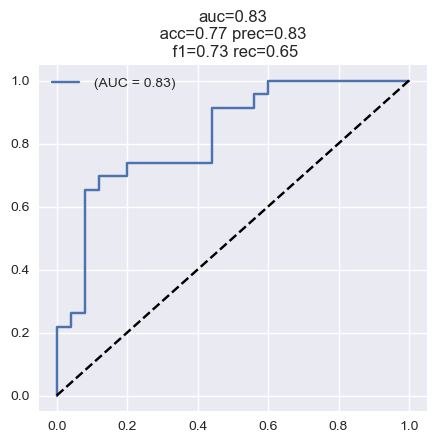

In [25]:
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test_list, y_pred_list)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5,4.5))
plt.plot(fpr, tpr, label=f' (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.legend()

plt.title('auc={:.2f}\n acc={:.2f} prec={:.2f} \n f1={:.2f} rec={:.2f}'.format(roc_auc, accuracy,precision, f1, recall))


(0.0, 0.3)

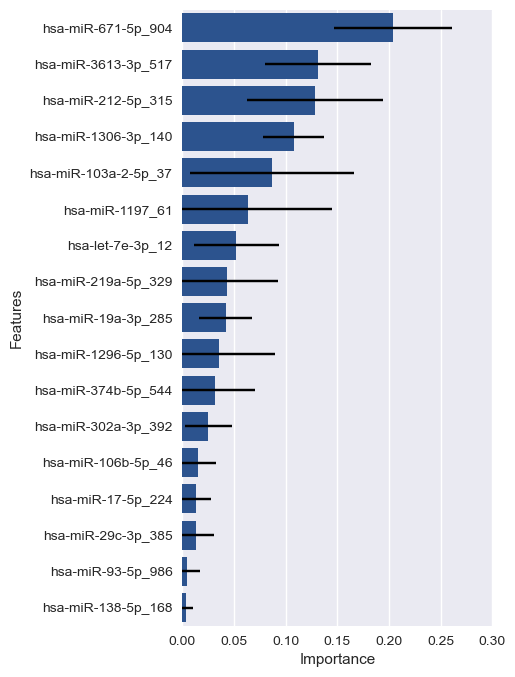

In [26]:
importances_mean = np.mean(importances, axis=0)
importances_mean

importances_std = np.std(importances, axis=0)
importances_std

df = pd.DataFrame(index=list(X_.columns),
        columns = ["Features","Importance", "std"])

df.iloc[:, 0] = list(X_.columns)
df.iloc[:, 1] = importances_mean
df.iloc[:, 2] = importances_std

df1 = df.sort_values('Importance', ascending=False)
plt.figure(figsize=(4,8))
sns.barplot(x="Importance", y="Features", data = df1, color= '#1C4F9E', xerr=df1['std'])
plt.xlim([0,0.30])